# Análisis exploratorio y clustering del proyecto

## Remesas vs migracion Guatemalteca 2011-2021

### Integrantes del proyecto

- Marco Pablo Orozco Saravia (20857)
- Yong Bum Park (20117)
- Santiago Taracena Puga (20017)
- Gabriel Alejandro Vicente Lorenzo (20498)


Para este proyecto se desea realizar un análisis exploratorio sobre una base de datos realizada a partir de varias fuentes confiables que nos proporciona el banco mundial y el banco de Guatemala, tratando de buscar una relación entre las remesas registradas en una década y la migración total del país vs a su población. Se planea que esta base se vuelva más robusta en medida que recursos se liberen a lo largo de estos días, cómo lo sería el Instituto Nacional de Estadística de Guatemala cuando su servidor vuelva.

A continuación se agregan los links de ciertos recursos utilizados

- https://datos.bancomundial.org/indicador/SP.POP.TOTL?locations=GT
- https://datos.bancomundial.org/indicator/SM.POP.NETM?end=2021&locations=GT&start=1960&view=chart
- https://www.ine.gob.gt/estadisticas-de-migracion/
- http://www.banguat.gob.gt/page/remesas-familiares-0

## Descripción de variables

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("datos_remesas_migracion_2011_2021.csv")

display(df.head()) 

Anio  Enero_IMD  Febrero_IMD Marzo_IMD Abril_IMD Mayo_IMD Junio_IMD  \
0  2011      283.3        304.6     384.1     371.3    415.3     416.4   
1  2012      305.1        350.4     402.1       419    451.6     432.7   
2  2013      357.9        351.2     424.1     451.2      477     417.2   
3  2014      394.2        383.9     459.2     490.7    494.1     481.9   
4  2015      407.4        432.0     556.5     503.8      519     536.3   

  Julio_IMD Agosto_IMD Septiembre_IMD  ...   VIR   VNM  VUT WLD   WSM    XKX  \
0     349.8      409.6          364.8  ... -1018 -4378 -934   0 -3246  -3033   
1     422.1      441.4          365.8  ...  -932 -4545 -879   0 -3215 -15323   
2     445.8      456.3          420.7  ...  -858 -4786 -824   0 -3182 -40468   
3     509.7      476.8          458.8  ...  -748 -4875 -785   0 -3161 -56637   
4     573.7      527.3          538.4  ...  -630 -4761 -756   0 -3137 -14819   

     YEM     ZAF    ZMB     ZWE  
0 -21770   65295  13605 -133434  
1 -20983   68846   9009  -66709  
2 -23747   63794  15574  -59918  
3 -30048  290874  16580  -59918  
4 -38355  644996  16283  -59918  

[5 rows x 178 columns]

In [4]:
# resumen estadístico
display(df.describe())

Anio   Enero_IMD  Febrero_IMD  Enero_VPA  Febrero_VPA  \
count    11.000000   11.000000    11.000000  11.000000    11.000000   
mean   2016.000000  534.690909   551.409091  12.745455    12.336364   
std       3.316625  212.275196   207.921141   6.258492     5.443395   
min    2011.000000  283.300000   304.600000   3.400000     5.300000   
25%    2013.500000  376.050000   367.550000   8.200000     8.600000   
50%    2016.000000  482.000000   558.000000  10.100000    11.500000   
75%    2018.500000  661.350000   660.300000  17.800000    14.200000   
max    2021.000000  906.800000   942.900000  21.900000    23.900000   

       Marzo_VPA  Abril_VPA   Mayo_VPA  Junio_VPA  Julio_VPA  ...  \
count  11.000000  11.000000  11.000000  11.000000  11.000000  ...   
mean   12.327273  12.590909  12.609091  12.554545  12.445455  ...   
std     7.589874  10.722822  11.578813  11.222510   9.960659  ...   
min     4.000000   0.300000  -3.200000  -0.900000   1.400000  ...   
25%     8.550000   8.450000   7.950000   8.550000   8.150000  ...   
50%     9.200000   9.900000   9.600000   9.300000  10.200000  ...   
75%    14.750000  11.850000  13.650000  13.700000  13.650000  ...   
max    31.200000  41.800000  43.100000  42.700000  39.600000  ...   

               VIR          VNM         VUT   WLD          WSM           XKX  \
count    11.000000    11.000000   11.000000  11.0    11.000000     11.000000   
mean   -574.818182 -3794.545455 -562.272727   0.0 -2607.909091 -26624.000000   
std     305.149412  1264.106828  276.068503   0.0   847.114686  15352.899661   
min   -1018.000000 -4875.000000 -934.000000   0.0 -3246.000000 -56637.000000   
25%    -803.000000 -4653.000000 -804.500000   0.0 -3171.500000 -33816.000000   
50%    -526.000000 -4378.000000 -404.000000   0.0 -2824.000000 -31383.000000   
75%    -458.000000 -3463.500000 -403.000000   0.0 -2604.000000 -15050.000000   
max       0.000000  -992.000000 -197.000000   0.0  -882.000000  -3033.000000   

                 YEM            ZAF           ZMB            ZWE  
count      11.000000      11.000000     11.000000      11.000000  
mean   -43754.454545   31709.272727  14788.363636  -61320.818182  
std     26093.497701  354290.349255   4057.827036   27469.568594  
min   -101468.000000 -866101.000000   9009.000000 -133434.000000  
25%    -39734.000000   16831.000000  11310.000000  -59918.000000  
50%    -39672.000000   30852.000000  16283.000000  -59918.000000  
75%    -26897.500000   67070.500000  17652.000000  -59918.000000  
max    -20983.000000  644996.000000  20268.000000  -25005.000000  

[8 rows x 159 columns]

'Número de filas:'

11

'Número de columnas:'

178

Anio           0
Enero_IMD      0
Febrero_IMD    0
Marzo_IMD      0
Abril_IMD      0
              ..
XKX            0
YEM            0
ZAF            0
ZMB            0
ZWE            0
Length: 178, dtype: int64

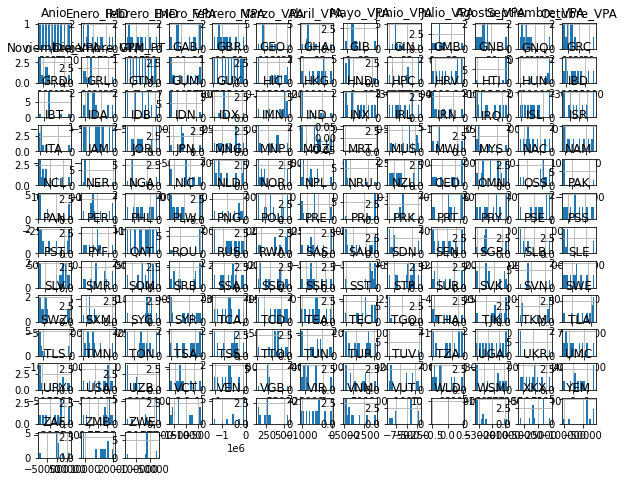

Anio  Enero_IMD  Febrero_IMD  Enero_VPA  Febrero_VPA  \
Anio         1.000000   0.978230     0.973627   0.048176     0.168940   
Enero_IMD    0.978230   1.000000     0.990368   0.107917     0.191824   
Febrero_IMD  0.973627   0.990368     1.000000   0.101622     0.260561   
Enero_VPA    0.048176   0.107917     0.101622   1.000000     0.686497   
Febrero_VPA  0.168940   0.191824     0.260561   0.686497     1.000000   
...               ...        ...          ...        ...          ...   
XKX         -0.022922   0.076730     0.118800  -0.069938     0.202564   
YEM         -0.840794  -0.903811    -0.907843  -0.100484    -0.307846   
ZAF         -0.147217  -0.135444    -0.213591  -0.523937    -0.726717   
ZMB         -0.064852  -0.215879    -0.220605   0.078253    -0.176067   
ZWE          0.756437   0.720584     0.715500  -0.013816     0.119779   

             Marzo_VPA  Abril_VPA  Mayo_VPA  Junio_VPA  Julio_VPA  ...  \
Anio          0.428241   0.384382  0.351539   0.415090   0.487048  ...   
Enero_IMD     0.451666   0.411883  0.376553   0.438753   0.507473  ...   
Febrero_IMD   0.543540   0.499334  0.465878   0.524100   0.582934  ...   
Enero_VPA     0.021971  -0.190833 -0.197106  -0.193871  -0.242679  ...   
Febrero_VPA   0.405350   0.155278  0.121972   0.137699   0.055463  ...   
...                ...        ...       ...        ...        ...  ...   
XKX           0.215987   0.141365  0.140586   0.132854   0.092783  ...   
YEM          -0.612728  -0.526693 -0.458878  -0.521263  -0.561191  ...   
ZAF          -0.279426  -0.259058 -0.270566  -0.246393  -0.157121  ...   
ZMB          -0.216767  -0.210513 -0.145596  -0.152478  -0.160551  ...   
ZWE           0.379918   0.322005  0.240934   0.292406   0.390851  ...   

                  VIR       VNM       VUT  WLD       WSM       XKX       YEM  \
Anio         0.952211  0.806761  0.960337  NaN  0.844829 -0.022922 -0.840794   
Enero_IMD    0.942152  0.898757  0.945851  NaN  0.922150  0.076730 -0.903811   
Febrero_IMD  0.930789  0.897730  0.959334  NaN  0.918373  0.118800 -0.907843   
Enero_VPA    0.214706  0.091854  0.258526  NaN  0.164893 -0.069938 -0.100484   
Febrero_VPA  0.339588  0.184505  0.390618  NaN  0.331483  0.202564 -0.307846   
...               ...       ...       ...  ...       ...       ...       ...   
XKX          0.044086  0.335663 -0.000159  NaN  0.281252  1.000000 -0.277545   
YEM         -0.869590 -0.932780 -0.814791  NaN -0.979267 -0.277545  1.000000   
ZAF         -0.160519 -0.097864 -0.376316  NaN -0.137139  0.085263  0.069739   
ZMB         -0.155460 -0.505010 -0.048610  NaN -0.536402 -0.593574  0.497628   
ZWE          0.769214  0.573444  0.701211  NaN  0.677568 -0.251385 -0.705185   

                  ZAF       ZMB       ZWE  
Anio        -0.147217 -0.064852  0.756437  
Enero_IMD   -0.135444 -0.215879  0.720584  
Febrero_IMD -0.213591 -0.220605  0.715500  
Enero_VPA   -0.523937  0.078253 -0.013816  
Febrero_VPA -0.726717 -0.176067  0.119779  
...               ...       ...       ...  
XKX          0.085263 -0.593574 -0.251385  
YEM          0.069739  0.497628 -0.705185  
ZAF          1.000000 -0.086284 -0.035678  
ZMB         -0.086284  1.000000 -0.222765  
ZWE         -0.035678 -0.222765  1.000000  

[159 rows x 159 columns]

In [5]:
import matplotlib.pyplot as plt


display("Número de filas:", df.shape[0])
display("Número de columnas:", df.shape[1])


display(df.isnull().sum())

df.hist(bins=20, figsize=(10,8))
plt.show()


display(df.corr())

In [10]:
from ydata_profiling import ProfileReport
data = df.loc[:, ["Anio", "Enero_IMD", "Febrero_IMD", "Marzo_IMD", "Abril_IMD", "Mayo_IMD", "Junio_IMD", "Julio_IMD", "Agosto_IMD", "Septiembre_IMD", "Octubre_IMD", "Noviembre_IMD", "Diciembre_IMD", "Total_IMD"]]

profile = ProfileReport(data, title='Informe de perfil de datos', explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
data = df.loc[:, ["Anio", "Enero_VPA", "Febrero_VPA", "Marzo_VPA", "Abril_VPA", "Mayo_VPA", "Junio_VPA", "Julio_VPA", "Agosto_VPA", "Septiembre_VPA", "Octubre_VPA", "Noviembre_VPA", "Diciembre_VPA"]]


profile = ProfileReport(data, title='Informe de perfil de datos', explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

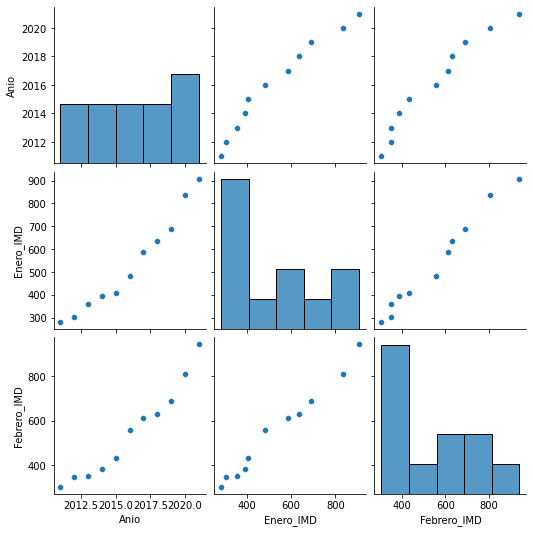

In [9]:
data = df.loc[:, ["Anio", "Enero_IMD", "Febrero_IMD", "Marzo_IMD", "Abril_IMD", "Mayo_IMD", "Junio_IMD", "Julio_IMD", "Agosto_IMD", "Septiembre_IMD", "Octubre_IMD", "Noviembre_IMD", "Diciembre_IMD", "Total_IMD"]]


sns.pairplot(data)

<AxesSubplot:>

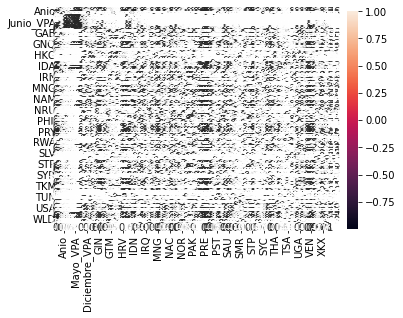

In [8]:
sns.heatmap(df.corr(), annot = True) 